In [1]:
from cifar10_import import *
from collections import defaultdict
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Import CIFAR-10 Dataset
x_images, y_labels = importCifar10("combined")

<BarContainer object of 10 artists>

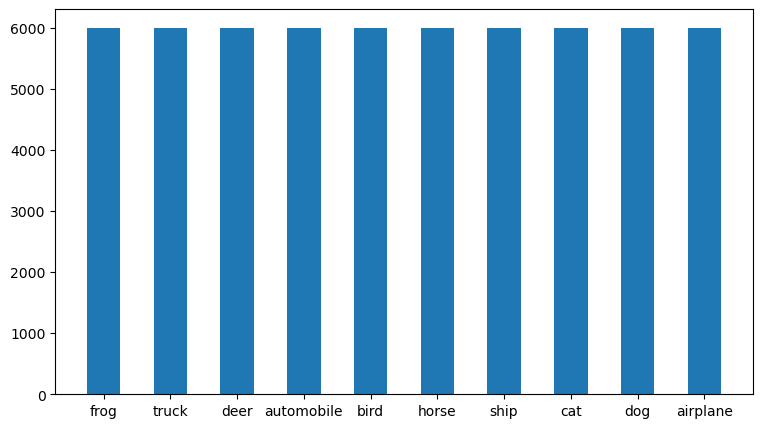

In [3]:
# See distribution of images
y_distribution = defaultdict(int)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for y in y_labels:
    y_distribution[class_names[y[0]]]+=1

names = list(y_distribution.keys())
values = list(y_distribution.values())

fig = plt.figure(figsize=(9,5))
plt.bar(names,values,width=0.5)

In [4]:
# Creating the training and testing sets (training is 60% of total)
X_train, X_test, y_train, y_test = train_test_split(x_images,y_labels,test_size=0.6,stratify=y_labels,shuffle=True)

# Create Validation Set (50% of test set)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=0.5,stratify=y_test,shuffle=True)

In [5]:
X_train_grayScaled = grayScale(X_train)
# y_train_grayScaled = grayScale(y_train)

X_val_grayScaled = grayScale(X_val)
# y_val_grayScaled = grayScale(y_val)

X_test_grayScaled = grayScale(X_test)
# y_test_grayScaled = grayScale(y_test)

In [6]:
y_train_be = np.array([y[0] for y in y_train])
y_val_be = np.array([y[0] for y in y_val])
y_test_be = np.array([y[0] for y in y_test])

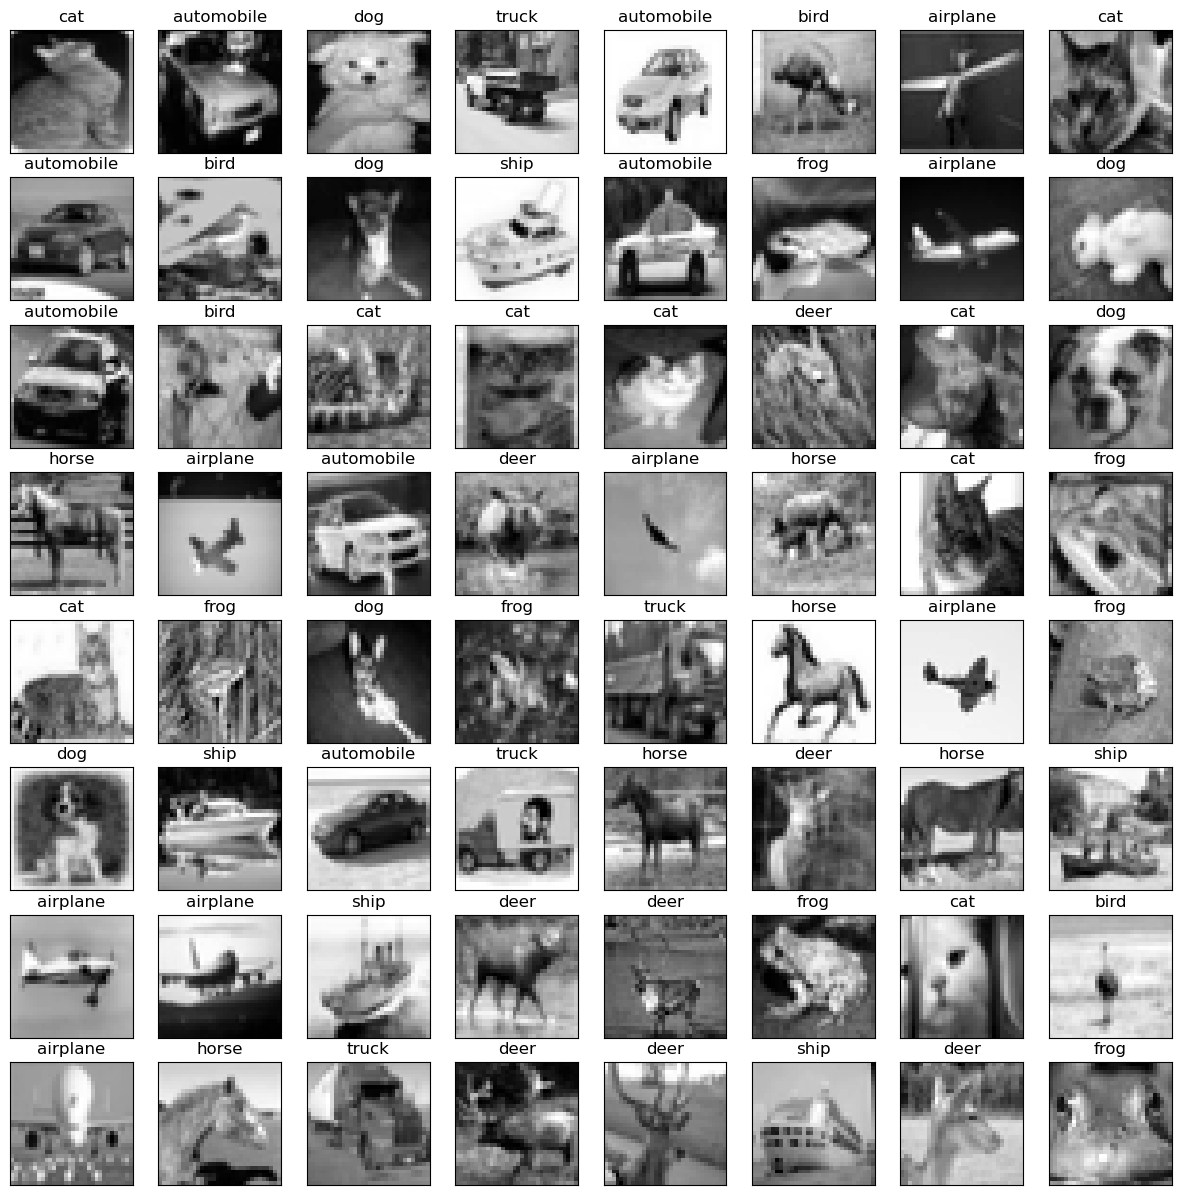

In [7]:
plt.figure(figsize=(15,15))
plt.rcParams['image.cmap'] = 'gray'
# Loop over the first 64 images
for i in range(64):
    # Create a subplot for each image
    
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    c = plt.imshow(X_train_grayScaled[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

To-Do:
- 10 kNN classifiers (one for each class, binary) vs 1 big kNN classifier
    - Which one is better?
- Optimal k value
- Confusion Matrix (Precision vs Recall)
- Grayscale vs Colored
- Background vs No Background?
- Partitioning
- Cross Validation
- Learning Curves
- Dimensionality Loss
- What it means in Context

In [ ]:
def plotErrorRate(x_train,x_test,y_train,y_test):
    figure, axes = plt.subplots(1, figsize=(6, 6))

    k = [1, 2, 5, 10]
    valid_error_y =  list()
    for i in k:
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(x_train,y_train)
        print(f"-- Created kNN for k = {i}")
        y_pred = neigh.predict(x_test)
        valid_error_y.append(1 - accuracy_score(y_test,y_pred))
        print(f"-- Calculated Accuracy for k = {i}")

    axes.semilogx(k,valid_error_y, color = "green", label = "Testing Error")
    axes.set_xlabel('k', fontsize=10)
    axes.set_ylabel('Error Rate', fontsize=10)
    axes.set_title("Error Rates vs k")
    axes.legend()

In [8]:
def computeClassAcc(c,model, x_train, x_test):
    y_train_c = [1 if c == class_names[y] else 0 for y in y_train_be]
    y_test_c = [1 if c == class_names[y] else 0 for y in y_test_be]
    model.fit(x_train,y_train_c)
    y_pred = model.predict(x_test)
    return accuracy_score(y_pred, y_test_c)

def normalizeX(scaled = False):
    temp_x_train = X_train.flatten().reshape(len(X_train), 3072)
    temp_x_test = X_test.flatten().reshape(len(X_test), 3072)
    temp_x_train_gray = X_train_grayScaled.flatten().reshape(len(X_train_grayScaled), 1024)
    temp_x_test_gray = X_test_grayScaled.flatten().reshape(len(X_test_grayScaled), 1024)
    
    if scaled == True:
        scalar = StandardScaler()
        scalar_gray = StandardScaler()
        temp_x_train = scalar.fit_transform(temp_x_train)
        temp_x_test = scalar.transform(temp_x_test)
        temp_x_train_gray = scalar_gray.fit_transform(temp_x_train_gray)
        temp_x_test_gray = scalar_gray.transform(temp_x_test_gray)
        print("--Scaled training & test sets")
    
    return temp_x_train,temp_x_test,temp_x_train_gray,temp_x_test_gray

In [9]:
def computeAccuracy(scaled = False, k = 5):
    temp_x_train,temp_x_test,temp_x_train_gray,temp_x_test_gray = normalizeX(scaled)
    
    knn_colored = KNeighborsClassifier(n_neighbors=k)
    knn_grayscaled = KNeighborsClassifier(n_neighbors=k)

    knn_colored.fit(temp_x_train,y_train_be)
    knn_grayscaled.fit(temp_x_train_gray,y_train_be)

    y_pred_colored = knn_colored.predict(temp_x_test)
    y_pred_gray = knn_grayscaled.predict(temp_x_test_gray)

    print(f"Accuracy for Colored kNN: {accuracy_score(y_pred_colored,y_test_be)}")
    print(f"Accuracy for Grayscale kNN: {accuracy_score(y_pred_gray,y_test_be)}")

In [17]:
for i in range(2):
    computeAccuracy(i)

Accuracy for Colored kNN: 0.3041111111111111
Accuracy for Grayscale kNN: 0.2619444444444444
--Scaled training & test sets
Accuracy for Colored kNN: 0.30827777777777776
Accuracy for Grayscale kNN: 0.26311111111111113


In [10]:
# Essentially, in the training data, you have 9/10 images that aren't a class c
temp_x_train, temp_x_test, temp_x_train_gray, temp_x_test_gray = normalizeX(True)
for c in class_names:
    knn_colored_binary = KNeighborsClassifier(n_neighbors=5)
    knn_grayscaled_binary = KNeighborsClassifier(n_neighbors=5)
    print(f"{c.capitalize()} (Colored: {'{:.2f}%'.format(computeClassAcc(c,knn_colored_binary,temp_x_train,temp_x_test)*100)}, Grayscale: {'{:.2f}%'.format(computeClassAcc(c,knn_grayscaled_binary,temp_x_train_gray,temp_x_test_gray)*100)})")

--Scaled training & test sets
Airplane (Colored: 90.33%, Grayscale: 88.02%)
Automobile (Colored: 90.71%, Grayscale: 90.62%)
Bird (Colored: 87.46%, Grayscale: 87.87%)
Cat (Colored: 89.61%, Grayscale: 89.54%)
Deer (Colored: 84.04%, Grayscale: 84.15%)
Dog (Colored: 90.09%, Grayscale: 89.98%)
Frog (Colored: 89.58%, Grayscale: 89.40%)
Horse (Colored: 90.83%, Grayscale: 90.76%)
Ship (Colored: 88.63%, Grayscale: 86.15%)
Truck (Colored: 90.41%, Grayscale: 90.37%)
